In [75]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


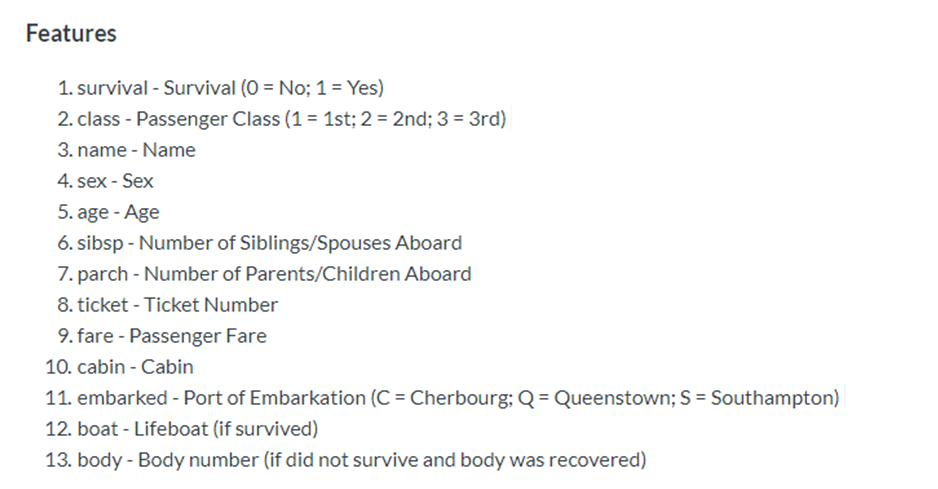

## Loading data

In [76]:
df = pd.read_excel('../archive/titanic3.xlsx')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## EDA

In [77]:
print(df.columns)
df.isnull().sum()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [78]:
ages = df['age']


## Cleaning up data

Imputing the null values for age and fare

In [79]:
mean_age = df['age'].mean()
print(mean_age)
mean_fare = df['fare'].mean()
df['age'] = df['age'].fillna(mean_age)
print(df['age'].mean())
df['fare'] = df['fare'].fillna(mean_age)
df['age'].isnull().sum()
df['fare'].isnull().sum()
df

29.8811345124283
29.881134512428297


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


What other columns may need attention?

In [91]:
df.isnull().sum()
print(df['body'].unique())
df['body'].describe()

[ nan 135.  22. 124. 148. 208. 172. 269.  62. 133. 275. 147. 110. 307.
  38.  80.  45. 258. 126. 292. 175. 249. 230. 122. 263. 234. 189. 166.
 207. 232.  16. 109.  96.  46. 245. 169. 174.  97.  18. 130.  17. 295.
 286. 236. 322. 297. 155. 305.  19.  75.  35. 256. 149. 283. 165. 108.
 121.  52. 209. 271.  43.  15. 101. 287.  81. 294. 293. 190.  72. 103.
  79. 259. 260. 142. 299. 171.   9. 197.  51. 187.  68.  47.  98. 188.
  69. 306. 120. 143. 156. 285.  37.  58.  70. 196. 153.  61.  53. 201.
 309. 181. 173.  89.   4. 206. 327. 119.   7.  32.  67. 284. 261. 176.
  50.   1. 255. 298. 314.  14. 131. 312. 328. 304.]


count    121.000000
mean     160.809917
std       97.696922
min        1.000000
25%       72.000000
50%      155.000000
75%      256.000000
max      328.000000
Name: body, dtype: float64

All null values for numerical columns that have meaning seem to have been resolved.

In [81]:
dtypes = df.dtypes
print(dtypes)

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


## Encoding categorical data

We will encode the categorical data so we can use all numerical data for the training of our model

In [82]:
columns_to_encode = ['sex']
encoded_df = pd.get_dummies(df, columns=columns_to_encode)

Result

In [83]:
encoded_df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",True,False
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",False,True
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",False,True
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False


## Selecting features based on correlation with survival rate

We will plot features against survival rate and see which features make sense to train a model on.

In [84]:
encoded_df.columns
valuable_cols = ['pclass','survived','age','sibsp','parch','fare','sex_female','sex_male']

# Define the categories and their corresponding weights
categories = [[1, 2, 3]]
weights = [3, 2, 1]

# Sort the categories in ascending order
categories_sorted = [sorted(cat) for cat in categories]

# Create a dictionary to map each category to its weight
category_weights = {cat: weight for cat, weight in zip(categories_sorted[0], weights)}

# Create a function to apply the weights to the encoded values
def apply_weights(x):
    return category_weights[x]

# Apply the weights to the 'pclass' column
encoded_df['pclass'] = encoded_df['pclass'].apply(apply_weights)

df_valuable = encoded_df[valuable_cols]
df_valuable

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male
0,3,1,29.000000,0,0,211.3375,True,False
1,3,1,0.916700,1,2,151.5500,False,True
2,3,0,2.000000,1,2,151.5500,True,False
3,3,0,30.000000,1,2,151.5500,False,True
4,3,0,25.000000,1,2,151.5500,True,False
...,...,...,...,...,...,...,...,...
1304,1,0,14.500000,1,0,14.4542,True,False
1305,1,0,29.881135,1,0,14.4542,True,False
1306,1,0,26.500000,0,0,7.2250,False,True
1307,1,0,27.000000,0,0,7.2250,False,True


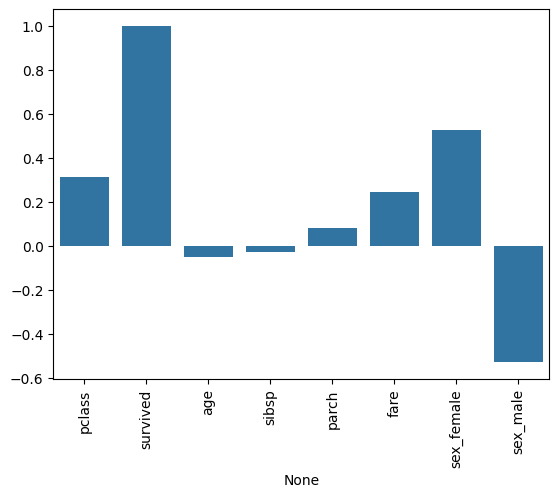

pclass        0.312469
survived      1.000000
age          -0.050199
sibsp        -0.027825
parch         0.082660
fare          0.244247
sex_female    0.528693
sex_male     -0.528693
dtype: float64


In [85]:
corr_matrix = df_valuable.corrwith(df['survived'])
sns.barplot(x=corr_matrix.index, y=corr_matrix.values)
plt.xticks(rotation=90)
plt.show()
print(corr_matrix)

These correlation values allow us to choose the most valuable features for predicting the survived column.
I will go with:
 - pclass
 - age
 - sibsp
 - parch
 - fare
 - sex_female
 - sex_male

## Training model

In [52]:
feature_cols = ['pclass','age','sibsp','parch','fare','sex_female','sex_male']

X = df_valuable[feature_cols]
y = df_valuable['survived']

In [53]:
print(X.dtypes)

pclass          int64
age           float64
sibsp           int64
parch           int64
fare          float64
sex_female       bool
sex_male         bool
dtype: object


In [54]:
print(y)

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)

      pclass        age  sibsp  parch      fare  sex_female  sex_male
1118       1  25.000000      0      0    7.9250       False      True
44         3  41.000000      0      0  134.5000        True     False
1072       1  29.881135      0      0    7.7333       False      True
1130       1  18.000000      0      0    7.7750        True     False
574        2  29.000000      1      0   21.0000       False      True
...      ...        ...    ...    ...       ...         ...       ...
763        1   0.166700      1      2   20.5750        True     False
835        1  29.881135      0      0    8.0500       False      True
1216       1  29.881135      0      0    7.7333        True     False
559        2  20.000000      0      0   36.7500        True     False
684        1  32.000000      1      1   15.5000        True     False

[1047 rows x 7 columns]
      pclass        age  sibsp  parch     fare  sex_female  sex_male
1139       1  38.000000      0      0   7.8958       False      Tr

### Training the model

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

print('Intercept', model.intercept_)
print("Coefficient", model.coef_)

Intercept 0.34549146299298117
Coefficient [ 0.15324377 -0.0048038  -0.04519957 -0.01001022  0.00040381  0.24874797
 -0.24874797]


In [57]:
coefficients = model.coef_.reshape(7,-1)
variables = np.array([['pclass','age','sibsp','parch','fare','sex_female','sex_male']]).reshape(7,-1)

coeff = pd.DataFrame(coefficients, variables)

print(coeff)

                      0
(pclass,)      0.153244
(age,)        -0.004804
(sibsp,)      -0.045200
(parch,)      -0.010010
(fare,)        0.000404
(sex_female,)  0.248748
(sex_male,)   -0.248748


## Predictions

Now that we have trained our model it's time to make some predictions

In [58]:
y_pred = model.predict(X_test)

Print the actual and predicted values for the first 25 records from the test set

In [59]:
compare_df = pd.DataFrame({'Actual': y_test[:25], 'Predicted': y_pred[:25]})
print(compare_df)

      Actual  Predicted
1139       0   0.070631
533        1   0.798317
459        0   0.167175
1150       0   0.112300
393        0   0.295856
1189       1   0.679802
5          1   0.336614
231        1   0.318993
330        0   0.134664
887        1   0.109720
531        0   0.265765
790        0   0.045538
427        1   0.350674
1260       1   0.664989
251        1   0.948620
486        0   0.292180
436        1   0.639946
31         1   0.376841
186        1   0.800956
1051       0   0.094713
769        0   0.147231
642        0  -0.000606
1087       0   0.118653
55         1   0.969954
678        0   0.172111


Visualization of first 10 results

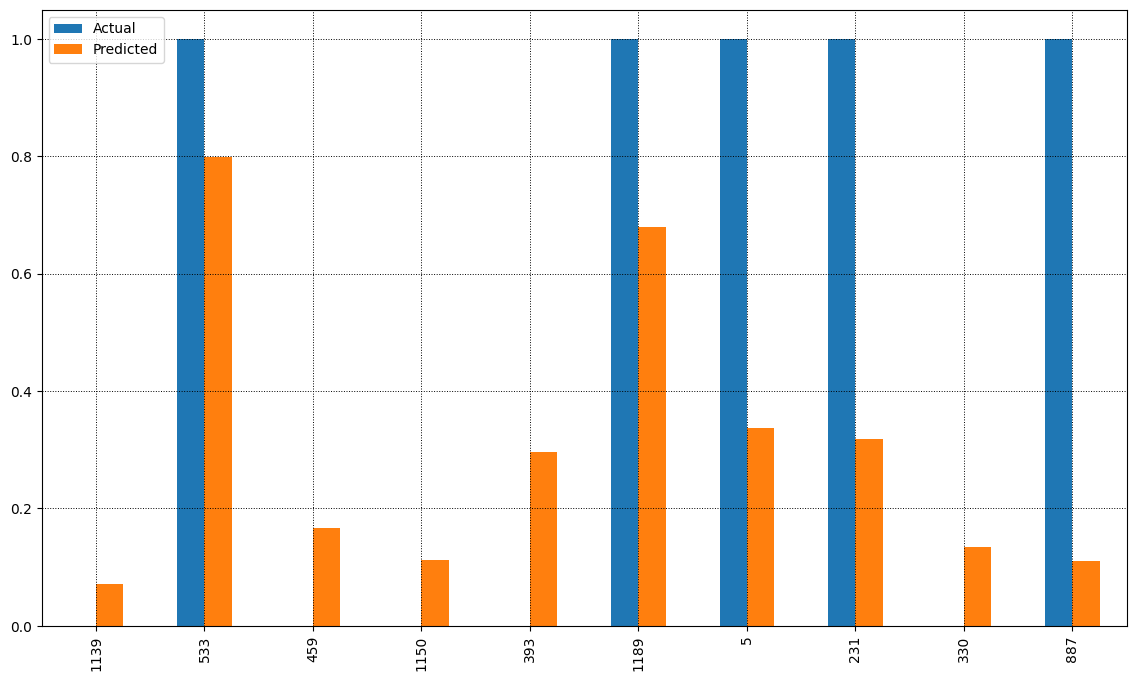

In [60]:
compare25_df = compare_df.head(10)
compare25_df.plot(kind='bar', figsize=(14,8))
plt.grid(linestyle=':', linewidth='0.7', color='black')
plt.show()

In [61]:
print("Mean absolute error =", round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test, y_pred), 2))
print("Root Mean Squared Error =", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.31
Mean squared error = 0.15
Root Mean Squared Error = 0.39
R2 score = 0.37


# Decision Tree

Training our model using a decision tree algorithm

In [62]:
feature_cols = ['pclass','age','sibsp','parch','fare','sex_female','sex_male']

X = df_valuable[feature_cols]
y = df_valuable['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Training the classifier

In [63]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=6)
clf = clf.fit(X, y)

Visualizing the decision tree

In [64]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [65]:
predictions = clf.predict(X_test)
y_pred = np.round(predictions).astype(int)

# Convert y_test to integers
int_y_test = y_test.astype(int).values



## Performance metrics

In [66]:
compare_df = pd.DataFrame({'Actual': y_test[:25], 'Predicted': y_pred[:25]})
print(compare_df)

      Actual  Predicted
201        0          0
115        0          0
255        1          1
1103       0          0
195        1          1
1281       0          0
1138       0          0
288        1          1
270        1          1
248        0          0
1015       0          0
602        0          0
789        0          0
546        1          1
927        0          0
88         1          1
807        0          0
1247       1          1
962        0          0
761        0          0
639        0          0
891        0          0
65         1          1
1074       0          0
1009       0          0


Accuracy

In [67]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8702290076335878


Confusion matrix

In [68]:
metrics.confusion_matrix(y_test, y_pred, labels=[0,1])

array([[147,   9],
       [ 25,  81]], dtype=int64)

Precision score

In [69]:
metrics.precision_score(y_test, y_pred)

0.9

Report

In [70]:
print(metrics.classification_report(y_test, y_pred, target_names=['died', 'survived']))

              precision    recall  f1-score   support

        died       0.85      0.94      0.90       156
    survived       0.90      0.76      0.83       106

    accuracy                           0.87       262
   macro avg       0.88      0.85      0.86       262
weighted avg       0.87      0.87      0.87       262



In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, auc, roc_curve, r2_score, precision_recall_curve
# R2 Score
r2_decision_tree = r2_score(y_test, y_pred)
print("R2 Score:", r2_decision_tree)

# Accuracy
accuracy_decision_tree = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_decision_tree)

# Precision
precision_decision_tree = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision_decision_tree)

# Recall
recall_decision_tree = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall_decision_tree)

# F1-score
f1_score_decision_tree = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1_score_decision_tree)

# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", confusion_matrix_decision_tree)

R2 Score: 0.46129656507015004
Accuracy: 0.8702290076335878
Precision: 0.8729984022723237
Recall: 0.8702290076335878
F1-Score: 0.8680973785902372
Confusion matrix:
 [[147   9]
 [ 25  81]]


## plotting the results

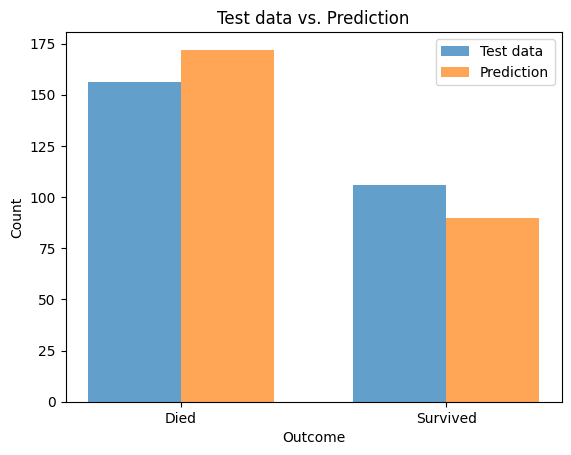

In [73]:
true_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred)

labels = ['Died', 'Survived']

x = np.arange(len(labels))

width = 0.35

plt.bar(x - width/2, true_counts, width, label='Test data', align='center', alpha=0.7)

plt.bar(x + width/2, predicted_counts, width, label='Prediction', align='center', alpha=0.7)

plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Test data vs. Prediction')
plt.xticks(x, labels)
plt.legend()

# Show the plot
plt.show()